<a href="https://colab.research.google.com/github/nedokormysh/Stepik_data_analysis_R/blob/week_3_stat_part_2/Stepik_data_analysis_R_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("psych")
library("psych")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’




# 3_1_5

Напишите функцию corr.calc, которая на вход получает data.frame с двумя количественными переменными, рассчитывает коэффициент корреляции Пирсона и возвращает вектор из двух значений: коэффициент корреляции и p - уровень значимости.

Пример работы функции:


> corr.calc( mtcars[, c(1,5)] )  # на вход подаем данные mtcars только с переменными mpg и drat


[1] 0.6811719078 0.0000177624

 > corr.calc( iris[,1:2] ) # на вход подаем данные iris только с переменными Sepal.Length и Sepal.Width


[1] -0.1175698 0.1518983


При написании функции обратите внимание, что названия переменных входящего dataframe могут быть произвольными. Пишите функцию с учетом, что она должна работать на любом  dataframe с двумя количественными переменными как в примере выше.

Не забудьте подгрузить библиотеку library(psych), если хотите использовать ее при решении этой задачи.

In [3]:
head(mtcars[, c(1,5)])

,mpg,drat
,<dbl>,<dbl>
Mazda RX4,21.0,3.90
Mazda RX4 Wag,21.0,3.90
Datsun 710,22.8,3.85
Hornet 4 Drive,21.4,3.08
Hornet Sportabout,18.7,3.15
Valiant,18.1,2.76


In [11]:
df <- mtcars[, c(1,5)]
res <- corr.test(x=df[1], y=df[2])
c(res$r, res$p)

[1] 0.6811719078 0.0000177624

In [12]:
corr.calc <- function(df){
    res <- corr.test(x=df[1], y=df[2])
    return(c(res$r, res$p))
}

In [14]:
corr.calc( mtcars[, c(1,5)] )
corr.calc( iris[,1:2] )

[1] 0.6811719078 0.0000177624

[1] -0.1175698  0.1518983

In [ ]:
corr.calc <- function(x){
  cor.test(x = x[,1], y = x[,2])[c("estimate", "p.value")]
}

# 3_1_6

Напишите функцию filtered.cor которая на вход получает data.frame с  произвольным количеством переменных (как количественными, так и любых других типов), рассчитывает коэффициенты корреляции Пирсона между всеми парами количественных переменных и возвращает наибольшее по модулю значение коэффициента корреляции. (То есть функция может вернуть -0.9, если это наибольшая по модулю  корреляция).

Гарантируется наличие в data.frame хотя бы двух количественных переменных.

Обратите внимание: при проверке вашей функции на вход будут подаваться данные с различными именами колонок. Ваша функция должна корректно работать независимо от имен переменных. Перед тем, как сдавать решение, убедитесь, что ваша функция работает корректно на разных данных, с разными именами колонок.

Если вы хотите использовать функцию corr.test не забудьте загрузить библиотекy psych.

Данные для тренировки:

https://stepik.org/media/attachments/lesson/11504/step6.csv


step6 <-  read.table("step6.csv",  header=TRUE, sep=',' )

> filtered.cor(step6)

[1] 0.235997

> filtered.cor(my_df) #вымышленные данные, где максимальная по модулю корреляция отрицательна

[1] -0.9


> filtered.cor(iris)


[1] 0.9628654  


> iris$Petal.Length <- -iris$Petal.Length # сделаем отрицательной максимальную по модулю корреляцию
> filtered.cor(iris)

[1] - 0.9628654
* мы подробнее поговорим о функциях семейства apply в следующем курсе - Advanced R, но вы можете изучить справку о apply и sapply. Для решения данной задачи, эти функции могут пригодиться.
* обратите внимание на функцию which.max()
обратите внимание на конструкцию diag(matrix) <- n
* если вы получаете ошибку, 'x' must be a numeric vector, значит в данных остались не только количественные переменные.

In [15]:
df <- read.csv('https://stepik.org/media/attachments/lesson/11504/step6.csv')
head(df)

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,TY2PWH,-16.633,-11.830,9FL3MI,14.197,-116.628,38RT18,-4.531,-14.234,21.701,12.736,JG0IUG,48.110,38.352
2,Y3D6ZU,8.646,3.066,B5BPAL,-31.837,-3.290,N9GKKB,-22.311,107.117,26.253,3.109,DAJ7P0,0.942,75.388
3,CRW2OZ,17.355,-13.517,L6QJXI,56.945,-51.174,WCAYX5,-17.371,-26.932,52.735,-8.870,Z87TIP,3.419,149.406
4,26DOSM,-24.280,39.919,8360S6,11.424,-16.051,CRKYZB,47.055,15.509,-96.000,23.039,VX0ZZC,43.498,95.207
5,BYEWCV,31.736,24.103,NVYKT3,7.096,-38.985,ZMQOD7,-0.576,-80.631,142.549,6.685,GOIUSH,-39.280,-108.598
6,XIAF7Q,6.056,19.486,MA7RJU,-49.344,36.861,ZUDXGZ,13.305,-0.754,-75.627,11.401,LV0AVZ,-110.628,-74.704


In [20]:
df <- df[sapply(df, is.numeric)]
b <- cor(df)
max(b)

[1] 1

In [ ]:
filtered.cor <- function(df){
  df <- df[sapply(df, is.numeric)]
  b <- cor(df)
  diag(b) <- 0
  return(ifelse(abs(max(b)) > abs(min(b)), max(b), min(b)))
}

1) x[sapply(x, is.numeric)] - можно обратиться не к столбцам дата-фрейма х, а к элементам списка х

2) cm-diag(ncol(cm)) - можно не присваивать 0 диагонали, а вычесть из исходной единичную матрицу нужного размера

In [ ]:
filtered.cor <- function(x){
    cm <- cor(x[sapply(x, is.numeric)])
    return(cm[which.max(abs(cm-diag(ncol(cm))))])
}

In [ ]:
# Пример правильного решения:

filtered.cor <- function(x){
num_var <- sapply(x, function(x) is.numeric(x))
cor_mat <- cor(x[, num_var])
diag(cor_mat) <- 0
return(cor_mat[which.max(abs(cor_mat))])}

# 3_1_7

Напишите функцию smart_cor, которая получает на вход dataframe с двумя количественными переменными. Проверьте с помощью теста Шапиро-Уилка, что данные в обеих переменных принадлежат нормальному распределению.

Если хотя бы в одном векторе распределение переменной отличается от нормального (p - value меньше 0.05), то функция должна возвращать коэффициент корреляции Спирмена. (Числовой вектор из одного элемента).

Если в обоих векторах распределение переменных от нормального значимо не отличается, то функция должна возвращать коэффициент корреляции Пирсона.

> test_data  <- read.csv("https://stepik.org/media/attachments/course/129/test_data.csv﻿")

> smart_cor(test_data)
[1] -0.1031003

In [22]:
test_data  <- read.csv("https://stepik.org/media/attachments/course/129/test_data.csv")
# test_data

In [25]:
smart_cor <- function(df){
  df1 <- shapiro.test(df[[1]])$p.value
  df2 <- shapiro.test(df[[2]])$p.value
  if ((df1 < 0.05) | (df2 < 0.05)) {
    res <- cor.test(~ df[, 1] + df[, 2], df, method = "spearman")
  } else {res <- cor.test(~ df[, 1] + df[, 2], df, method = "pearson")
  }
  return(res$estimate)
}

In [26]:
smart_cor(test_data)

cor 
-0.1031003

In [ ]:
Пример правильного решения:

smart_cor <- function(x){
if (shapiro.test(x[[1]])p < 0.05 ∣ shapiro.test(x[[2]])p < 0.05) {
return(cor.test(x[[1]], x[[2]], method = 'spearman')$estimate)
} else {return(cor.test(x[[1]], x[[2]], method = 'pearson')$estimate)}}

In [ ]:
smart_cor <- function(x){
  cor.test(x[[1]], x[[2]], method =
      ifelse(any(apply(x, 2, function (y) shapiro.test(y)$p) < 0.05),
             "spearman", "pearson"))$estimate
}

In [ ]:
smart_cor <- function(x){
  cor(x[[1]], x[[2]], method = if (shapiro.test(x[[1]])$p < 0.05 | shapiro.test(x[[2]])$p < 0.05) "spearman" else "pearson")
}

In [ ]:
smart_cor <- function(x){
  ifelse(shapiro.test(x[[1]])$p.value<0.05|shapiro.test(x[[2]])$p.value<0.05,
         cor(x,method = "spearman")[1,2], cor(x, method = "pearson")[1,2])
}

In [ ]:
sha_p <- function(x) shapiro.test(x)$p.value
smart_cor <- function(x) {
  method ="pearson"
  if (any(sapply(x, sha_p) < 0.05)) method = "spearman"
  return(psych::corr.test(x, method = method)$ci$r)
}

# 3_1_12

Скачайте набор данных - dataframe с двумя количественными переменными (вспомните при необходимости, как задавать разделитель и другие параметры функции read.table), постройте линейную регрессию, где - первая переменная - зависимая, вторая - независимая. В ответ укажите значения регрессионных коэффициентов сначала intercept затем  slope.

Десятичный разделитель - точка. В поле для ответа введите два числа, не округляйте значения, например;

12.434 6.2557

In [27]:
dataframe1 <- read.table("/content/dataset_11508_12.txt", sep=' ' )
model <- lm(dataframe1[,1] ~ dataframe1[,2], dataframe1)
print(model$coefficients)

    (Intercept) dataframe1[, 2] 
      2.8326401      -0.9085283 


# 3_1_13

Воспользуемся уже знакомыми данными diamonds из библиотеки ggplot2. Только для бриллиантов класса Ideal (переменная cut) c числом карат равным 0.46 (переменная carat) постройте линейную регрессию, где в качестве зависимой переменной выступает price, в качестве предиктора - переменная  depth. Сохраните коэффициенты регрессии в переменную fit_coef.
Памятка:


> fit <- lm(mpg ~ disp + wt, mtcars)

> fit$coefficients # коэффициенты модели

Это задание нужно решить, не используя цикл for().

In [29]:
install.packages("ggplot2")
library("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha




In [35]:
brilliants <- data.frame(diamonds)
ideal <- subset(brilliants, cut == 'Ideal' & carat == 0.46)
fit <- lm (price ~ depth, ideal)
fit_coef <- c(fit$coefficients[1], fit$coefficients[2])
fit_coef

(Intercept)       depth 
  -76.11030    21.43427

In [ ]:
data_for_model <- subset(diamonds, cut == 'Ideal' & carat == 0.46)
fit <- lm(price ~ depth, data_for_model)
fit_coef <- fit$coefficients

# 3_1_14

Напишите функцию regr.calc, которая на вход получает dataframe c двумя переменными.

Если две переменные значимо коррелируют (p - уровень значимости для коэффициента корреляции Пирсона меньше 0.05), то функция строит регрессионную модель, где первая переменная - зависимая, вторая - независимая. Затем создает в dataframe новую переменную с назанием fit, где сохраняет предсказанные моделью значения зависимой переменной. В результате функция должна возвращать исходный dataframe с добавленной новой переменной fit.

Если две переменные значимо не коррелируют, то функция возвращает строчку "There is no sense in prediction"

Примеры работы функции:


> my_df = iris[,1:2] # на вход подаем данные iris только с переменными Sepal.Length и Sepal.Width
> regr.calc(iris[,1:2]) # переменные значимо не коррелируют

[1] "There is no sense in prediction"



> my_df = iris[,c(1,4)] # на вход подаем данные iris только с переменными Sepal.Length и Petal.Width
> regr.calc(my_df) # переменные значимо коррелируют

    Sepal.Length Petal.Width      fit


1            5.1       0.2   4.955345

2            4.9       0.2   4.955345

3            4.7       0.2   4.955345
.            .         .     .
.            .         .     .



Обратите внимание, при проверке вашей функции на вход будут подаваться данные с различными именами колонок. Ваша функция должна корректно работать в независимости от имен переменных.

Перед тем как сдавать решение убедитесь, что ваша функция работает корректно на разных данных, с разными именами колонок.

In [ ]:
regr.calc <- function(df) {
  if(cor.test(df[,1], df[,2])$p.value < 0.05) {
    model <- lm(df[,1] ~ df[,2])
    df$fit <- predict(model)
    return(df)
  } else {
    return("There is no sense in prediction")
  }
}

# 3_1_15

Постройте scatterplot по данным iris, сохранив его в переменную my_plot :
Ось X - переменная Sepal.Width
Ось Y -  переменная Petal.Width
Цвет точек - переменная Species
Также добавьте линейное сглаживание для каждой группы наблюдений по переменной Species.

Если Вы все сделали правильно должен получиться следующий график:

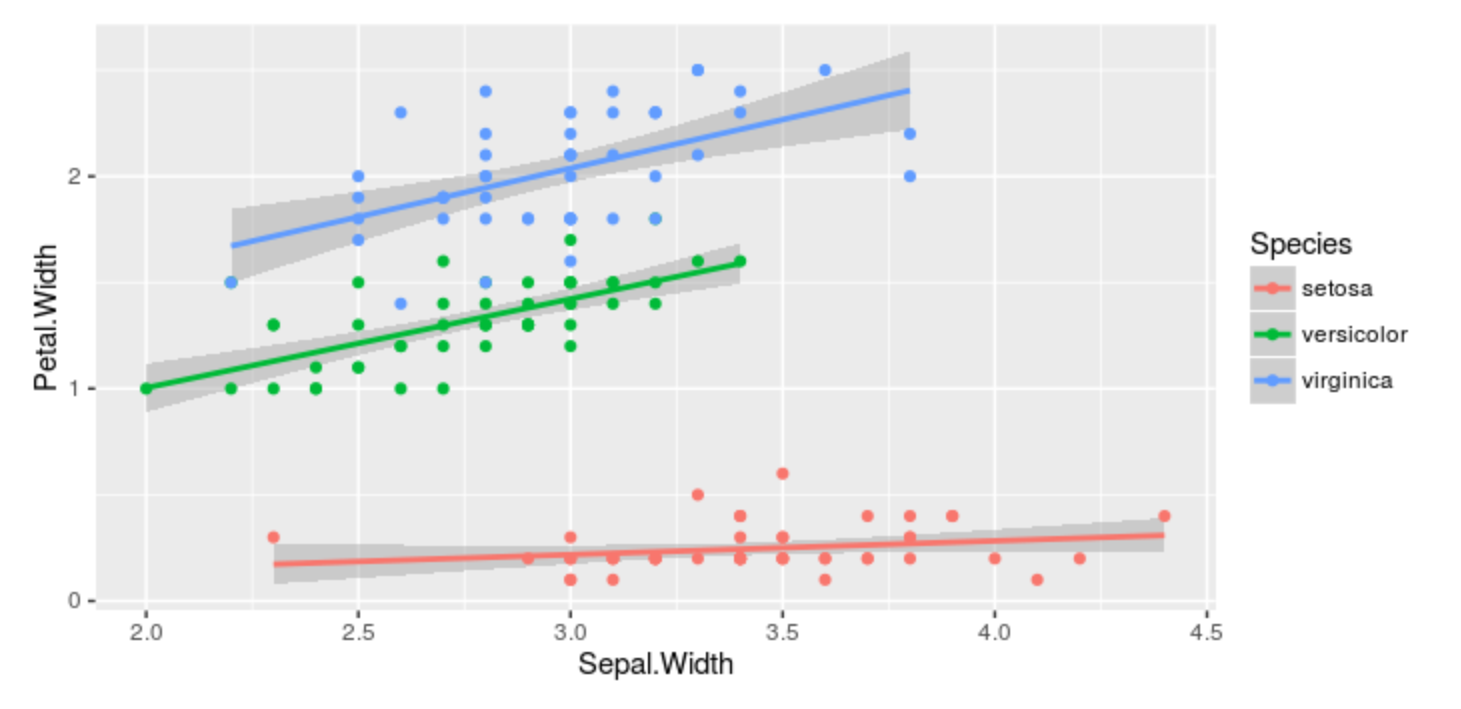

In [ ]:
my_plot <- ggplot()

In [ ]:
# import pandas as pd
# from matplotlib import pyplot as plt
# import seaborn as sns

# iris = pd.DataFrame(pd.read_csv('iris.csv'))

# sns.set_theme(color_codes=True)
# sns.lmplot(data=iris, x='Sepal.Width', y='Petal.Width', hue='Species', aspect=2)
# plt.show(figsize=(20, 10))

`geom_smooth()` using formula = 'y ~ x'


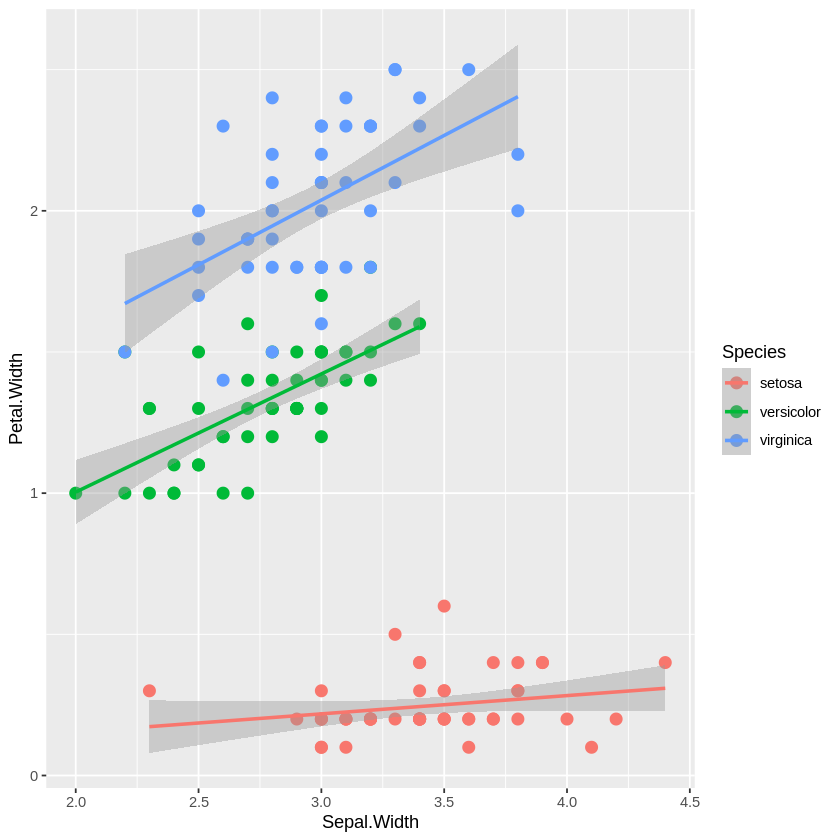

In [42]:
ggplot(iris, aes(Sepal.Width, Petal.Width, col = Species)) +
  geom_point(size = 3) +
  geom_smooth(method = 'lm')

`geom_smooth()` using formula = 'y ~ x'


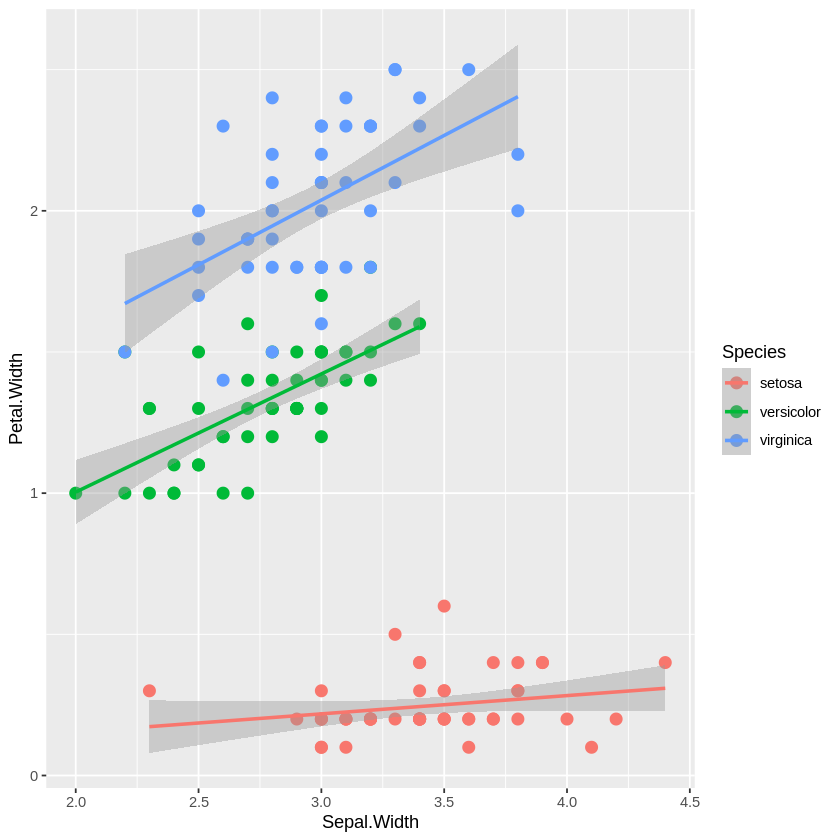

In [39]:
ggplot(iris, aes(Sepal.Width, Petal.Width,col=Species))+
  geom_point(size = 3)+
  geom_smooth(method = "lm")

In [ ]:
library(ggplot2)
my_plot <- ggplot(iris, aes(Sepal.Width, Petal.Width, col = Species)) +
  geom_point(size = 3) +
  geom_smooth(method = 'lm')

# Памятка

In [ ]:

cor.test(mtcars$mpg, mtcars$disp) # Расчет корреляции Пирсона

cor.test(~ mpg + disp, mtcars) # запись через формулу

cor.test(mtcars$mpg, mtcars$disp, method = "spearman") # Расчет корреляции Спирмена

cor.test(mtcars$mpg, mtcars$disp, method = "kendall") # Расчет корреляции Кендала

cor(iris[, -5]) # построение корреляционной матрицы

fit <- lm(mpg ~ disp, mtcars) # построение линейной регрессии

fit$coefficients # коэффициенты регрессии

fit$fitted.values # предсказанные значения зависимой переменной

При наличии одинаковых значений в переменных расчет непараметрических корреляций будет сопровождаться предупреждением о невозможности рассчитать точное значение p - value.

Если в ваших данных есть одинаковые наблюдения, но вы хотите рассчитать непараметрическую корреляцию, используйте функцию spearman_test  из пакета coin

In [ ]:
library(coin)
spearman_test(~ mpg + disp, mtcars)

Обратите внимание на различия в графиках. То что в первом aes() будет распространяться на все слои. А то, что в aes() конкретного geom - только на него.

In [ ]:
ggplot(mtcars, aes(mpg, disp, col = factor(am)))+
  geom_point()+
  geom_smooth()

ggplot(mtcars, aes(mpg, disp))+
  geom_point(aes(col = factor(am)))+
  geom_smooth()

ggplot(mtcars, aes(mpg, disp))+
  geom_point()+
  geom_smooth(aes(col = factor(am)))

predict -- это функция, вызываемая на объектах типа lm (и не только). Функции predict можно передать дополнительные аргументы (например, новый набор данных). Вызванный без аргументов, predict(model) заново посчитает значения модели на тех данных, на которых она подогнана.  $fitted.values -- это поле объекта типа lm, хранящее значения предсказаний модели на тех данных, на которых она была построена. Соответственно,

In [ ]:
 m <- lm(mpg ~ cyl + disp + drat, data = mtcars)
> fv <- m$fitted.values # чтение из памяти
> p <- predict(m) # новое вычисление
> all.equal(fv, p)
> true